<a href="https://colab.research.google.com/github/Harsh-58/DataScienceA2/blob/main/HarsJainU6Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt
!pip install bambi
import bambi as bmb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 4.2 MB/s eta 0:00:00


**Predicting Marathon Time**

In [2]:
import kagglehub
import os
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("girardi69/marathon-time-predictions")

# Print the path to confirm
print("Path to dataset files:", path)

# List the contents of the directory
dataset_files = os.listdir(path)
print("Files in the dataset directory:", dataset_files)

# Assuming the dataset contains a CSV file
csv_file_name = "MarathonData.csv"  # Replace with the actual file name
csv_file_path = os.path.join(path, csv_file_name)

# Load the CSV file
MarathonData = pd.read_csv(csv_file_path)

# Display the first few rows of the dataset
MarathonData

100%|██████████| 2.63k/2.63k [00:00<00:00, 752kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/girardi69/marathon-time-predictions/versions/2
Files in the dataset directory: ['MarathonData.csv']


,id,Marathon,Name,Category,km4week,sp4week,CrossTraining,Wall21,MarathonTime,CATEGORY
0,1,Prague17,Blair MORGAN,MAM,132.8,14.434783,NaN,1.16,2.37,A
1,2,Prague17,Robert Heczko,MAM,68.6,13.674419,NaN,1.23,2.59,A
2,3,Prague17,Michon Jerome,MAM,82.7,13.520436,NaN,1.30,2.66,A
3,4,Prague17,Daniel Or lek,M45,137.5,12.258544,NaN,1.32,2.68,A
4,5,Prague17,Luk ? Mr zek,MAM,84.6,13.945055,NaN,1.36,2.74,A
...,...,...,...,...,...,...,...,...,...,...
82,83,Prague17,Stefano Vegliani,M55,50.0,10.830325,NaN,2.02,3.93,D
83,84,Prague17,Andrej Madliak,M40,33.6,10.130653,ciclista 3h,1.94,3.93,D
84,85,Prague17,Yoi Ohsako,M40,55.4,11.043189,NaN,1.94,3.94,D
85,86,Prague17,Simon Dunn,M45,33.2,11.066667,NaN,2.05,3.95,D


<Axes: xlabel='sp4week', ylabel='MarathonTime'>

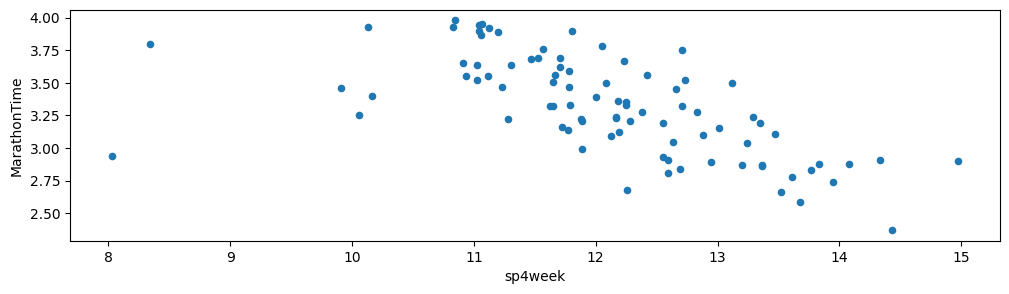

In [3]:
# Update the sp4week value for ID 82
MarathonData.loc[MarathonData['id'] == 82, 'sp4week'] = 11.125

# Plot the scatter plot
MarathonData.plot(x="sp4week", y="MarathonTime", figsize=(12, 3), kind="scatter")

<Axes: xlabel='km4week', ylabel='MarathonTime'>

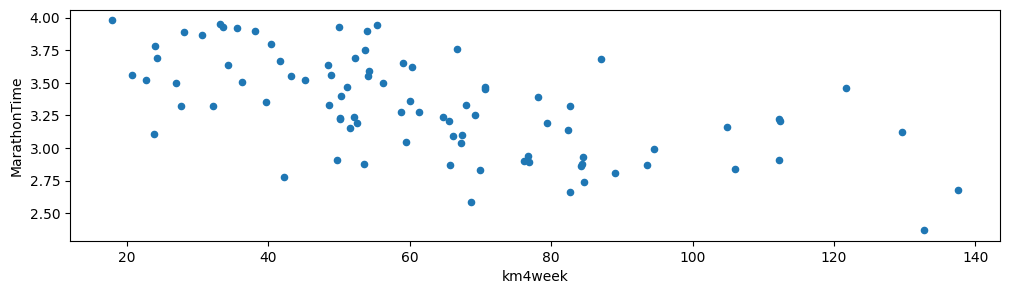

In [4]:
# Plot the scatter plot
MarathonData.plot(x="km4week", y="MarathonTime", figsize=(12, 3), kind="scatter")

In [10]:
# Model 1: sp4week and km4week
model_1 = bmb.Model("MarathonTime ~ sp4week + km4week", data=MarathonData)
idata_1 = model_1.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


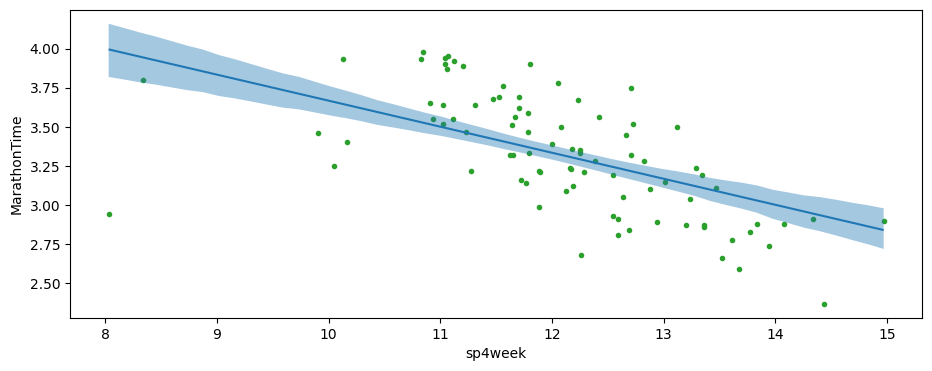

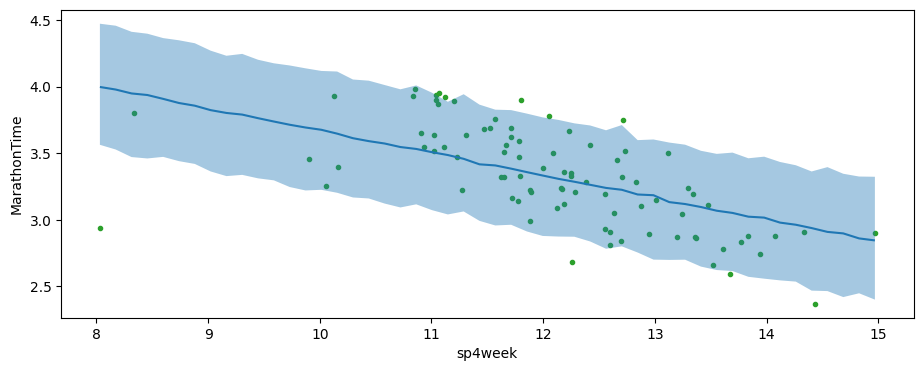

In [11]:
bmb.interpret.plot_predictions(model_1, idata_1, "sp4week", fig_kwargs={"figsize": (11, 4)})
plt.plot(MarathonData.sp4week, MarathonData.MarathonTime, "C2.", zorder=-3, label="Actual Data")
# Posterior predictive plot for Model 1
bmb.interpret.plot_predictions(model_1, idata_1, "sp4week", fig_kwargs={"figsize": (11, 4)}, pps=True)
plt.plot(MarathonData.sp4week, MarathonData.MarathonTime, "C2.", zorder=-3, label="Actual Data")

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


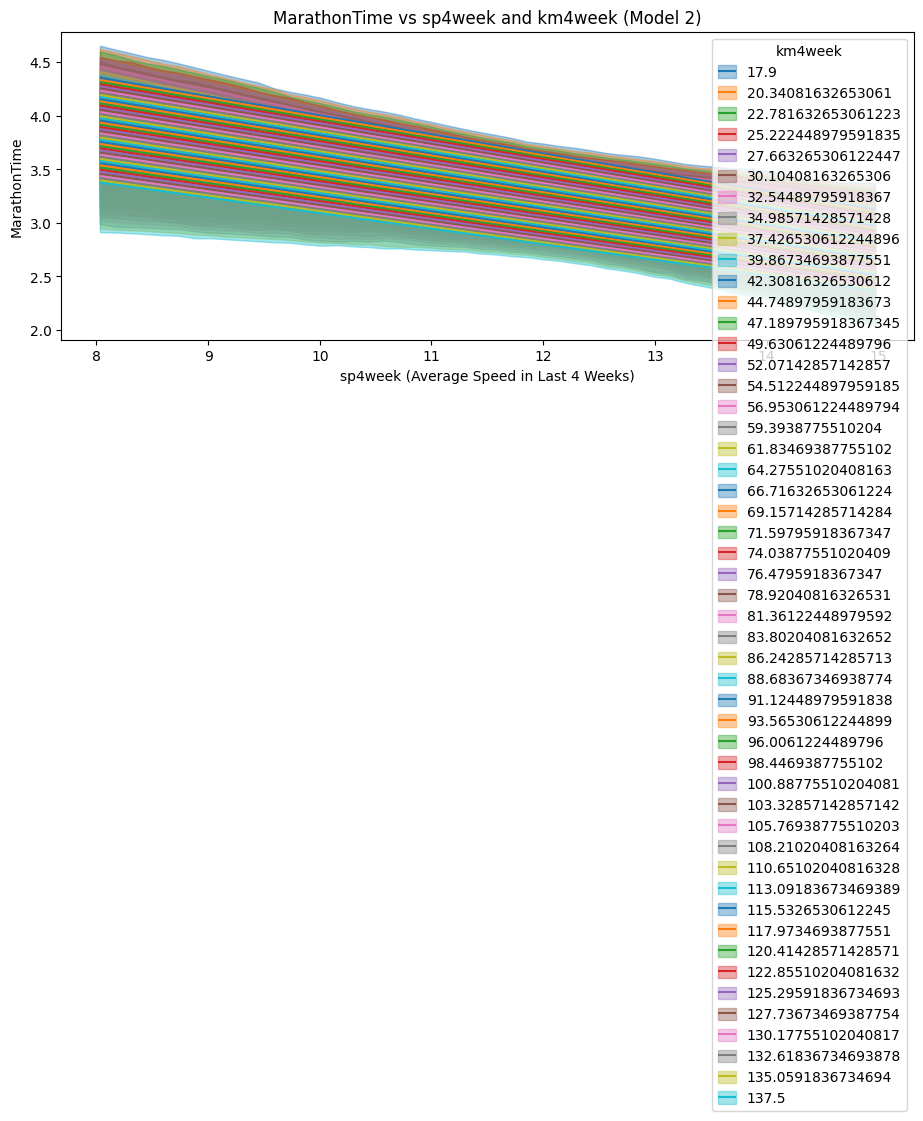

In [12]:
# Model 2: Interaction between sp4week and km4week
model_2 = bmb.Model("MarathonTime ~ sp4week + km4week + sp4week:km4week", data=MarathonData)
idata_2 = model_2.fit(idata_kwargs={'log_likelihood': True})

# Plot predictions for sp4week and km4week
bmb.interpret.plot_predictions(model_2, idata_2, ["sp4week", "km4week"], fig_kwargs={"figsize": (11, 4)})
plt.xlabel("sp4week (Average Speed in Last 4 Weeks)")
plt.ylabel("MarathonTime")
plt.title("MarathonTime vs sp4week and km4week (Model 2)")
plt.show()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


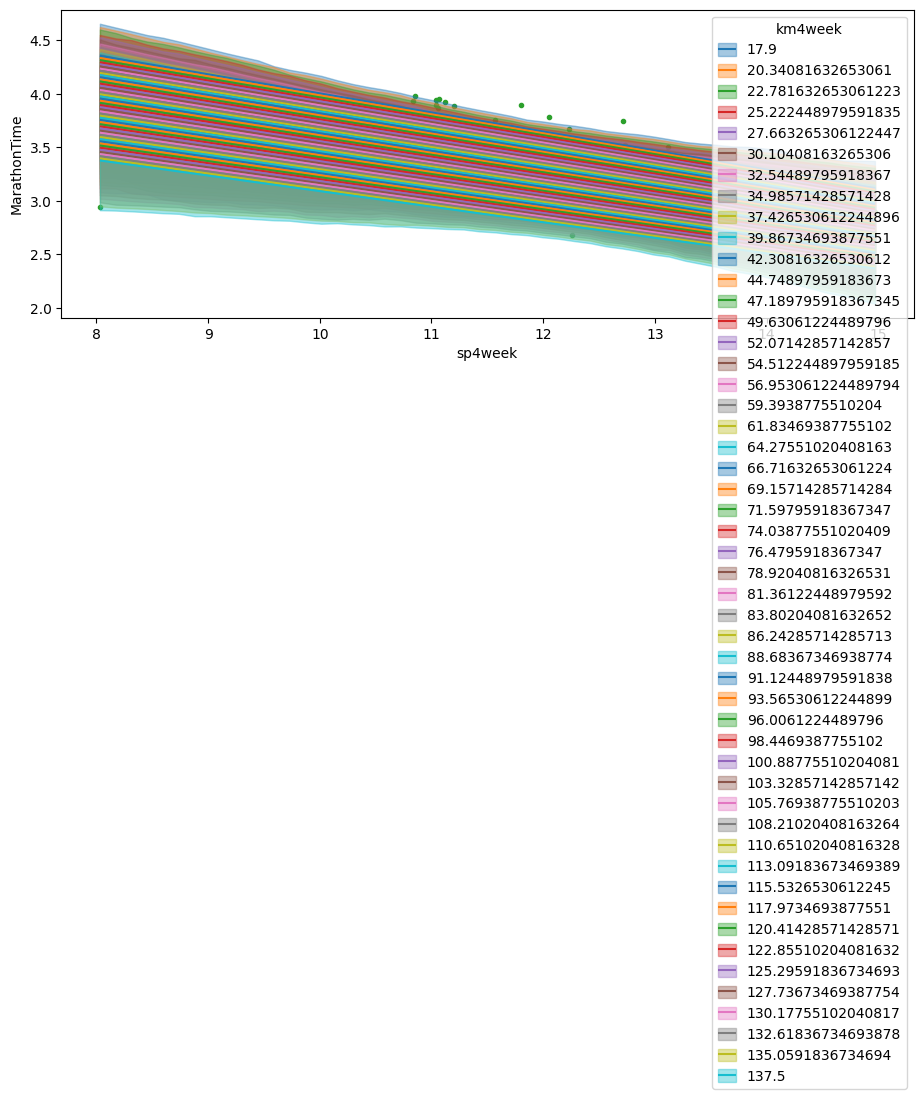

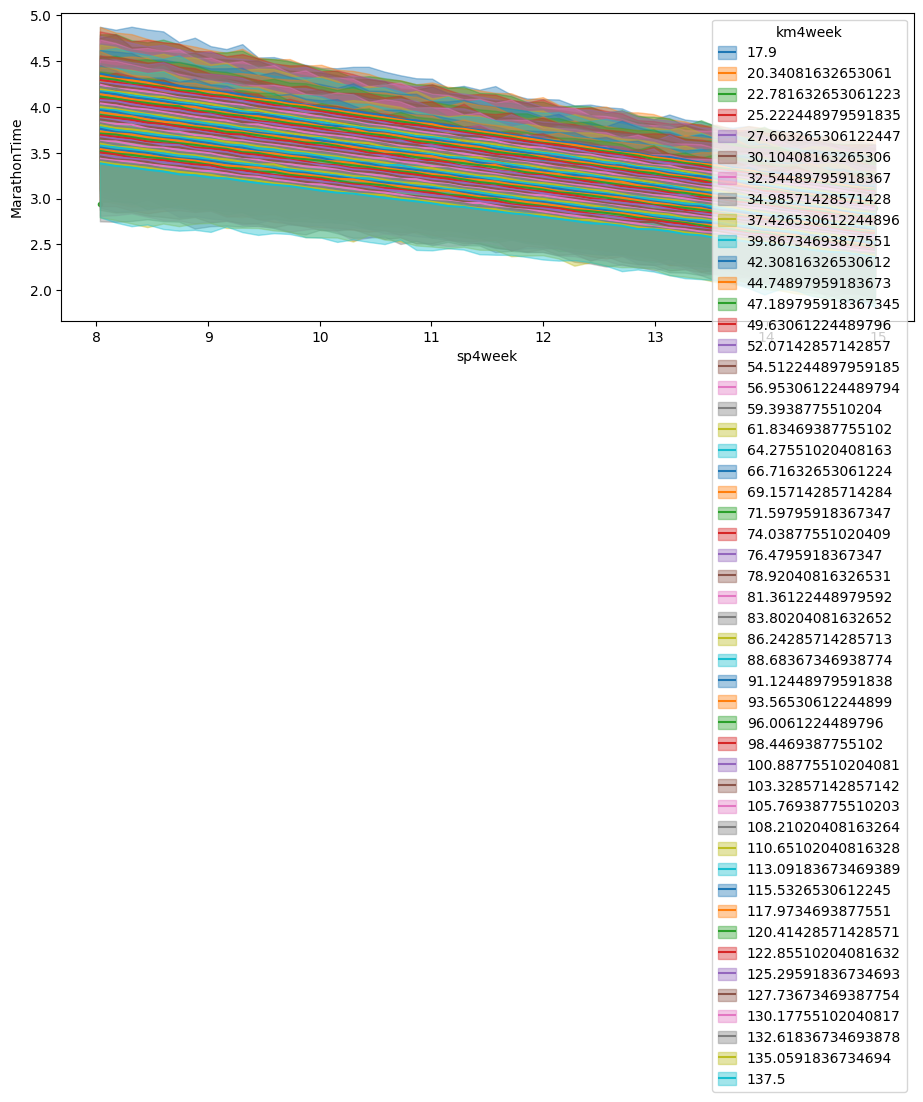

In [13]:
# Posterior mean plot for Model 2
bmb.interpret.plot_predictions(model_2, idata_2, ["sp4week", "km4week"], fig_kwargs={"figsize": (11, 4)})
plt.plot(MarathonData.sp4week, MarathonData.MarathonTime, "C2.", zorder=-3, label="Actual Data")
# Posterior predictive plot for Model 2
bmb.interpret.plot_predictions(model_2, idata_2, ["sp4week", "km4week"], fig_kwargs={"figsize": (11, 4)}, pps=True)
plt.plot(MarathonData.sp4week, MarathonData.MarathonTime, "C2.", zorder=-3, label="Actual Data")

In [14]:
MarathonData = MarathonData[~MarathonData["id"].isin([81, 74, 54, 52, 35, 26])]

In [15]:
# Model: Interaction between sp4week and Category + km4week
model_3 = bmb.Model(
    "MarathonTime ~ sp4week + km4week + Category + sp4week:Category",
    data=MarathonData
)
idata_3 = model_3.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='sp4week', ylabel='MarathonTime'>], dtype=object))

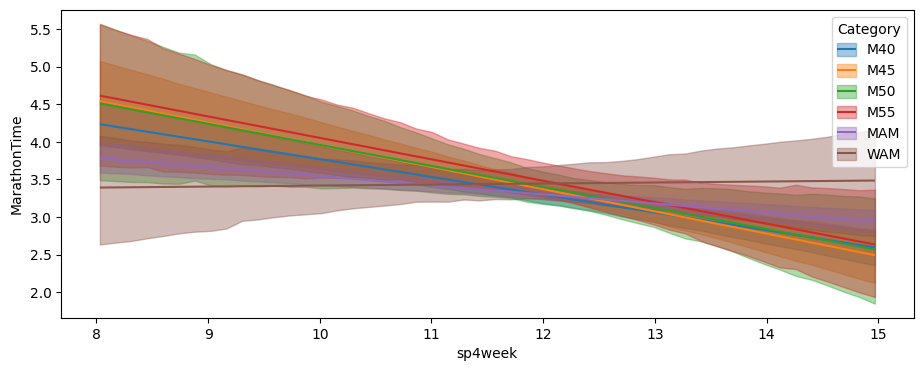

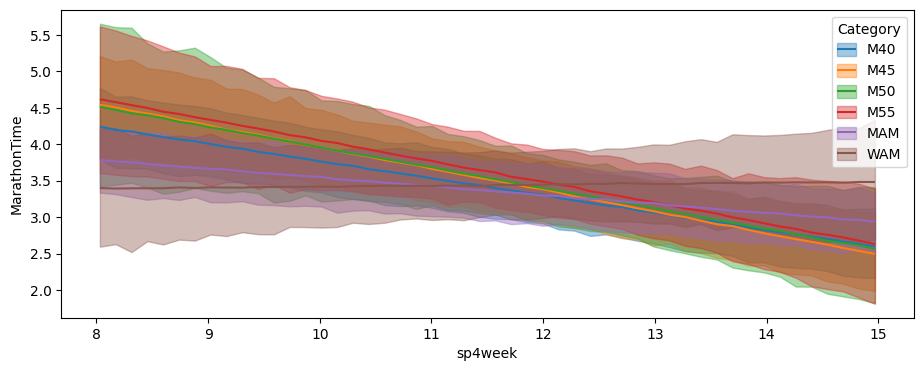

In [16]:
# Posterior mean plot for sp4week and Category
bmb.interpret.plot_predictions(
    model_3, idata_3,
    ["sp4week", "Category"],
    fig_kwargs={"figsize": (11, 4)}
)
# Posterior predictive plot for sp4week and Category
bmb.interpret.plot_predictions(
    model_3, idata_3,
    ["sp4week", "Category"],
    fig_kwargs={"figsize": (11, 4)},
    pps=True
)

In [23]:
# Compute LOO for each model
loo_1 = az.loo(idata_1)
loo_2 = az.loo(idata_2)
loo_3 = az.loo(idata_3)

# Compare models using LOO
cmp_df = az.compare({"model1": loo_1, "model2": loo_2, "model3": loo_3})
cmp_df
az.plot_compare(cmp_df)


/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

ValueError: The number of observations should be the same across all models